<a href="https://colab.research.google.com/github/LoTzuChin/113-1-FinancialBigData/blob/main/geneAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  5 of 5 completed


最佳投資組合股票: ['2330.tw', '1707.tw', '2201.tw', '1473.tw', '2501.tw']
對應投資比例: [0.1135318  0.0023861  0.44431844 0.37615991 0.06360375]
預期回報率: 0.234582488005414
投資風險: 0.23912535002169244


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20339 (\N{CJK UNIFIED IDEOGRAPH-4F73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

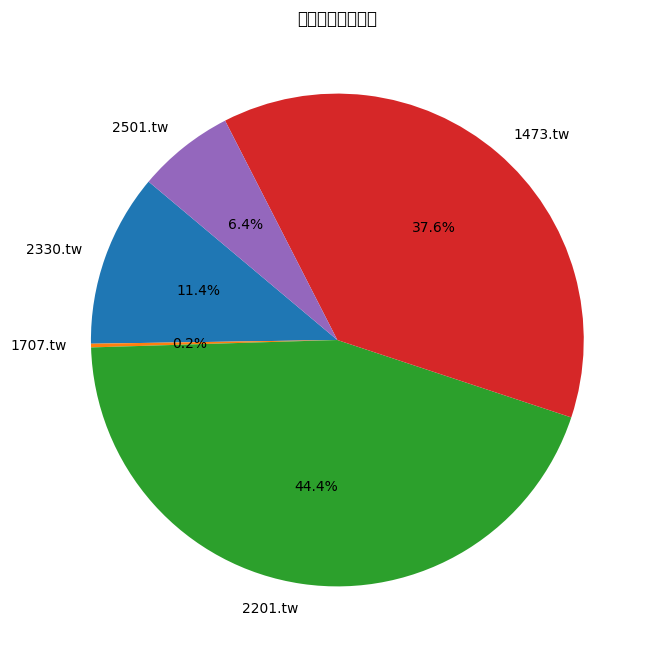

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# 設定參數
tickers = ["2330.tw", "1707.tw", "2201.tw", "1473.tw", "2501.tw"]  # 股票代碼
population_size = 50  # 族群大小
generations = 100  # 最大代數
crossover_rate = 0.8  # 交配率
mutation_rate = 0.05  # 突變率

# 下載股票數據
data = yf.download(tickers, start="2020-01-01", end="2023-12-31")['Adj Close']

# 計算年化回報率和協方差矩陣
daily_returns = data.pct_change().dropna()
annual_returns = daily_returns.mean() * 252  # 年化回報率
cov_matrix = daily_returns.cov() * 252  # 年化協方差矩陣

# 適應函數：Sharpe Ratio
def fitness(chromosome):
    portfolio_return = np.dot(chromosome, annual_returns)
    portfolio_risk = np.sqrt(np.dot(chromosome.T, np.dot(cov_matrix, chromosome)))
    # 如果權重總和超過 1，給予極低適應值
    if np.sum(chromosome) > 1.0:
        return 0
    return portfolio_return / (portfolio_risk + 1e-6)  # Sharpe Ratio

# 初始化族群
def initialize_population():
    population = np.random.rand(population_size, len(tickers))
    return population / np.sum(population, axis=1, keepdims=True)  # 正規化

# 選擇（輪盤選擇）
def select(population, fitness_scores):
    probs = fitness_scores / np.sum(fitness_scores)
    indices = np.random.choice(range(population_size), size=population_size, p=probs)
    return population[indices]

# 交配
def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, len(tickers)-1)
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))
        return child1, child2
    return parent1, parent2

# 突變
def mutate(chromosome):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = np.random.rand()  # 隨機改變基因
    return chromosome / np.sum(chromosome)  # 確保正規化

# 主程式
population = initialize_population()

for generation in range(generations):
    fitness_scores = np.array([fitness(chromo) for chromo in population])
    population = select(population, fitness_scores)

    next_generation = []
    for i in range(0, population_size, 2):
        parent1, parent2 = population[i], population[i+1]
        child1, child2 = crossover(parent1, parent2)
        next_generation.append(mutate(child1))
        next_generation.append(mutate(child2))

    population = np.array(next_generation)

# 最優解
fitness_scores = np.array([fitness(chromo) for chromo in population])
best_chromosome = population[np.argmax(fitness_scores)]
selected_stocks = [tickers[i] for i in range(len(best_chromosome)) if best_chromosome[i] > 0]
proportions = best_chromosome[best_chromosome > 0]
best_return = np.dot(best_chromosome, annual_returns)
best_risk = np.sqrt(np.dot(best_chromosome.T, np.dot(cov_matrix, best_chromosome)))

# 結果輸出
print("最佳投資組合股票:", selected_stocks)
print("對應投資比例:", proportions)
print("預期回報率:", best_return)
print("投資風險:", best_risk)

# 繪製餅圖
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=selected_stocks, autopct='%1.1f%%', startangle=140)
plt.title("最佳投資組合比例")
plt.show()
